In [5]:
from lxml import etree
import requests
import pandas as pd
import re
from urllib.parse import urlencode

In [6]:
headers={
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36',
}

In [52]:
url='https://www.haodf.com/doctor/5550972714/pingjia-zhenliao/8265261617.html'
response1 = requests.post(url=url,headers=headers)
# comments_info1=response1.json()
# comments_info1
response1

<Response [200]>


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=gbk" />
<title>任家俊大夫好不好,任家俊大夫怎么样_好大夫在线</title>
<meta name="keywords" content="任家俊大夫好不好,任家俊大夫怎么样" />
<meta name="description" content="病情描述:7-8年前体检发现肝囊肿，一开始比较小后来逐渐增大，去年11月发现肝囊肿长大到8cm，所以决定做手术切除。
看病过程:2022.11挂了瑞金医院肝胆外科任家俊医生门诊，当时任医生也建议手术治疗，开了入院登记卡..."/>
<meta name="mobile-agent" content="format=html5;url=https://m.haodf.com/doctor/5550972714/pingjia-zhenliao/8265261617.html">
<link rel="alternate" media="only screen and (max-width: 640px)" href="https://m.haodf.com/doctor/5550972714/pingjia-zhenliao/8265261617.html">
<link href="//i2.hdfimg.com/css/css.css?1303386395" rel="stylesheet" type="text/css" />
<link href="//i2.hdfimg.com/css/base.css?2012052401" rel="stylesheet" type="text/css" />
<link href="//i2.hdfimg.com/css/doctor.css?20151120" rel="stylesheet" 
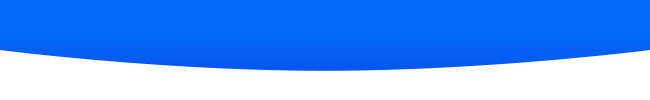
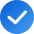
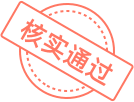
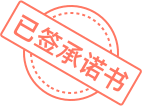

In [86]:
print(response1.text)

In [97]:
html = etree.HTML(response1.text)
timeneed = html.xpath('//body/div[5]/div/div[1]/div[1]/div[2]/div/div/table[1]/tbody/tr[2]/td[2]/table/tbody/tr[1]/td[3]/text()')
timeneed

[]

<html xmlns="http://www.w3.org/1999/xhtml" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=gbk" />
<title>&#20219;&#23478;&#20426;&#22823;&#22827;&#22909;&#19981;&#22909;,&#20219;&#23478;&#20426;&#22823;&#22827;&#24590;&#20040;&#26679;_&#22909;&#22823;&#22827;&#22312;&#32447;</title>
<meta name="keywords" content="&#20219;&#23478;&#20426;&#22823;&#22827;&#22909;&#19981;&#22909;,&#20219;&#23478;&#20426;&#22823;&#22827;&#24590;&#20040;&#26679;" />
<meta name="description" content="&#30149;&#24773;&#25551;&#36848;:7-8&#24180;&#21069;&#20307;&#26816;&#21457;&#29616;&#32925;&#22218;&#32959;&#65292;&#19968;&#24320;&#22987;&#27604;&#36739;&#23567;&#21518;&#26469;&#36880;&#28176;&#22686;&#22823;&#65292;&#21435;&#24180;11&#26376;&#21457;&#29616;&#32925;&#22218;&#32959;&#38271;&#22823;&#21040;8cm&#65292;&#25152;&#20197;&#20915;&#23450;&#20570;&#25163;&#26415;&#20999;&#38500;&#12290;&#10;&#30475;&#30149;&#36807;&#31243;:2022.11&#25346;&#201
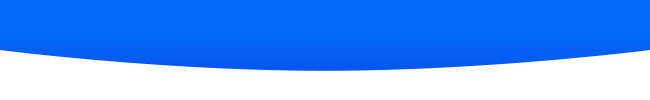
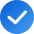
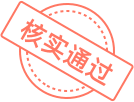
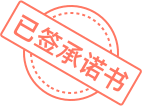

In [96]:
result = etree.tostring(html)
print(result.decode('utf-8'))

In [140]:
a = html.xpath('//body/div/div/div/div/div/div/div/table/tr/td/table/tbody/tr/td/text()')
a[3]

'时间：昨天09:14            \t\t            \t\t'

In [55]:
url='https://www.haodf.com/nhospital/pc/keshi/pingjia/ajaxGetAssessList'
data={
    'hospitalId':424,
    'diseaseId':0,
    'hospitalFacultyId':'',
    'commentType':1,  # 1是好评，2是差评
    'page':1
}

response = requests.post(url=url,data=data,headers=headers)
comments_info=response.json()['data']['commentInfoList']

In [56]:
comments_info

[{'patientName': '匿名患者[上海 嘉定]',
  'attachmentList': [],
  'diseaseTag': '乳腺疾病',
  'commentId': 8265269974,
  'commentDesc': '病情描述：乳腺结节\n看病过程：认真询问病情，安慰情绪\n康复情况：已经在慢慢长伤口，有痒感',
  'doctorInfo': {'headImgUrl': 'https://n3.hdfimg.com/g4/M07/71/CE/wIYBAGCagY-AdCcxAAEWFBhQpkw996_200_200_1.jpg?306f',
   'doctorId': 5686561980,
   'grade': '主治医师',
   'name': '高卫奇',
   'educateGrade': ''},
  'diseaseDesc': '乳腺结节手术',
  'efficacy': '很满意',
  'patientArea': '',
  'attitude': '很满意'},
 {'patientName': '匿名患者[福建 泉州]',
  'attachmentList': [],
  'diseaseTag': '乳腺癌',
  'commentId': 8265268798,
  'commentDesc': '病情描述：乳腺癌\n看病过程：黄医生手诊判断和检查结果一致，手术左乳切除腋下淋巴全清扫\n康复情况：术后伤口愈合快刀口也不是很痛，等待大病理报告后续治疗方案',
  'doctorInfo': {'headImgUrl': 'https://n1.hdfimg.com/g8/M03/5E/4A/t4YBAF5a9hOAZgtnAATIru_thOA676_200_200_1.jpg?4b62',
   'doctorId': 230799327,
   'grade': '副主任医师',
   'name': '黄欧',
   'educateGrade': '讲师'},
  'diseaseDesc': '乳腺癌',
  'efficacy': '很满意',
  'patientArea': '',
  'attitude': '很满意'},
 {'patientName': '匿名患者[江苏

In [63]:
doctorId = comments_info[0]['doctorInfo']['doctorId']

In [147]:
print(comments_info[0])

{'patientName': '匿名患者[上海 嘉定]', 'attachmentList': [], 'diseaseTag': '乳腺疾病', 'commentId': 8265269974, 'commentDesc': '病情描述：乳腺结节\n看病过程：认真询问病情，安慰情绪\n康复情况：已经在慢慢长伤口，有痒感', 'doctorInfo': {'headImgUrl': 'https://n3.hdfimg.com/g4/M07/71/CE/wIYBAGCagY-AdCcxAAEWFBhQpkw996_200_200_1.jpg?306f', 'doctorId': 5686561980, 'grade': '主治医师', 'name': '高卫奇', 'educateGrade': ''}, 'diseaseDesc': '乳腺结节手术', 'efficacy': '很满意', 'patientArea': '', 'attitude': '很满意'}


In [70]:
url = 'https://www.haodf.com/doctor/' + str(com['doctorInfo']['doctorId']) + '/pingjia-zhenliao/' + str(com['commentId']) + '.html'
response = requests.post(url=url,headers=headers)
html = etree.HTML(response.text)
time = html.xpath('//body/div/div/div/div/div/div/div/table/tr/td/table/tbody/tr/td/text()')
times.append(time[3])

In [3]:
def get_info(hospitalId,page_num,com_type):
    # 输入参数为医院的id，以及评论的页数
    for i in range(0,page_num):
        url='https://www.haodf.com/nhospital/pc/keshi/pingjia/ajaxGetAssessList'
        data={
            'hospitalId':int(hospitalId),
            'diseaseId':0,
            'hospitalFacultyId':'',
            'commentType':com_type,  # 1是好评，2是差评
            'page':i+1
        }
        response = requests.post(url=url,data=data,headers=headers)
        comments_info=response.json()['data']['commentInfoList']
        provinces=[]
        cities=[]
        diseaseTags=[]
        grades=[]
        names=[]
        diseaseDescs=[]
        efficacys=[]
        attitudes=[]
        doctorIds=[]
        commentIds=[]
        # times = []
        comments = []
        for com in comments_info:
            # 爬取地区
            area=com['patientName']
            try: # 有的患者没显示地区，则跳过
                province=re.findall('匿名患者\[(\w+) ',area)[0]
                city=re.findall(' (\w+)\]',area)[0]
                provinces.append(province)
                cities.append(city)
            except:
                provinces.append('')
                cities.append('')
            # 爬取疾病名称
            diseaseTags.append(com['diseaseTag'])
            # 爬取医生职称
            grades.append(com['doctorInfo']['grade'])
            # 爬取医生姓名
            names.append(com['doctorInfo']['name'])
            # 爬取手术类型
            diseaseDescs.append(com['diseaseDesc'])
            # 爬取疗效满意
            efficacys.append(com['efficacy'])
            # 爬取态度满意
            attitudes.append(com['attitude'])
            # 爬取医生id
            doctorIds.append(com['doctorInfo']['doctorId'])
            # 爬取评论ID
            commentIds.append(com['commentId'])
            # 爬取评论时间
#             url = 'https://www.haodf.com/doctor/' + str(com['doctorInfo']['doctorId']) + '/pingjia-zhenliao/' + str(com['commentId']) + '.html'
#             response = requests.post(url=url,headers=headers)
#             html = etree.HTML(response.text)
#             time = html.xpath('//body/div/div/div/div/div/div/div/table/tr/td/table/tbody/tr/td/text()')
#             times.append(time[3])
            # 爬取评论文本
            comments.append(com['commentDesc'])
        df=pd.DataFrame({'省份':provinces,'市(区)':cities,'疾病名称':diseaseTags,'医生职称':grades,'医生姓名':names,
                         '手术类型':diseaseDescs,'疗效满意度':efficacys,'态度满意度':attitudes,'医生ID':doctorIds,
                         '患者ID':commentIds,'评论文本':comments})
        df.to_csv(r'E:\0、大四上\2、文本挖掘 项目\项目\0、数据爬取\瑞金医院其他数据.csv',mode='a',index=False,header=False,encoding='utf-8')

In [ ]:
if __name__=='__main__':
    with open(r'F:\评论医院索引（南京）.txt','r',encoding='utf-8') as f:
        hos_list=f.readlines()
    for k in hos_list:
        hospitalId=k.strip()
        hos_url='https://www.haodf.com/hospital/'+hospitalId +'/pingjia.html'
        page_text = requests.get(url=hos_url,headers=headers).text
        tree=etree.HTML(page_text)
        # 计算一家医院的评论页数
        num_good = tree.xpath('//div[@class="left-cont"]//div[@class="good isCheck"]/text()')[0]
        num1=int(re.findall(' \d+',num_good)[0])//100  # 因为选取10%的评论，而每一页有10条评论
        num_bad = tree.xpath('//div[@class="left-cont"]//div[@class="bad"]/text()')[0]
        num2=int(re.findall(' \d+',num_bad)[0])//10    # 选取所有的评论，而每一页有10条评论
        get_info(hospitalId=hospitalId,page_num=num1,com_type=1)
        get_info(hospitalId=hospitalId,page_num=num2,com_type=2)

In [7]:
get_info(424,1000,1)